In [2]:
import numpy as np
import h5py
import os
import glob
import matplotlib.pyplot as plt

In [4]:
exptList = glob.glob(r'/run/user/1000/gvfs/smb-share:server=cup.pni.princeton.edu,share=murthy/Kyle/flies/pc2l_tnt/**')

In [15]:
saveDir = '/run/user/1000/gvfs/smb-share:server=cup.pni.princeton.edu,share=murthy/Kyle/code/pc2_tnt/plots'

In [17]:
def make_plot(featureFile, datetime, side, saveDirectory):
    # this is how we open and read the file with behavior features
    with h5py.File(featureFile, 'r') as f:
        fFV = np.array(f['fFV']) # storing the fFV in a numpy array
        mFV = np.array(f['mFV'])
        mfDist = np.array(f['mfDist'])

    fig = plt.figure(figsize=(10,3)) # creating a figure through matplotlib

    ax = fig.add_subplot(311) # adding a subplot to the figure. The numbers correspond to (rows, columns, plot index)
    ax.plot(fFV) # plotting female forward velocity
    ax.set_ylabel('fFV') # changing the ylabel

    ax = fig.add_subplot(312)
    ax.plot(mFV)
    ax.set_ylabel('mFV')

    ax = fig.add_subplot(313)
    ax.plot(mfDist)
    ax.set_ylabel('mfDist')

    plt.suptitle(datetime+'_'+side) # adding a title to the figure not the subplots
    plt.tight_layout() # adjusts spacing between plot elements
    plt.savefig(os.path.join(saveDirectory, f'{datetime}_{side}.png'))
    plt.close()

In [19]:
for expt in exptList:
    datetime = os.path.basename(expt) # this gets the parent folder for each experiment that contains left and right folders
    leftfly = os.path.join(expt, 'left', datetime+'left.h5') # path to file that contains behavior features of left fly
    rightfly = os.path.join(expt, 'right', datetime+'right.h5') # path to file that contains behavior features of right fly

    if os.path.exists(leftfly):
        make_plot(leftfly, datetime, 'left', saveDir)

    if os.path.exists(rightfly):
        make_plot(rightfly, datetime, 'right', saveDir)


# playing around with just one fly

In [25]:
flyTest = exptList[10]
datetime = os.path.basename(flyTest) # this gets the parent folder for each experiment that contains left and right folders
fly_features = os.path.join(flyTest, 'left', datetime+'left.h5') # path to file that contains behavior features of left fly
side = 'left'

In [33]:
with h5py.File(fly_features, 'r') as f:
    print(f.keys())
    fFV = np.array(f['fFV']) # storing the fFV in a numpy array'
    trxM = np.array(f['trxM'])

<KeysViewHDF5 ['egoF', 'egoFrM', 'egoM', 'egoMrF', 'expt_folder', 'expt_name', 'fFA', 'fFV', 'fLA', 'fLS', 'fLV', 'fRS', 'fmAng', 'fmFV', 'fmLS', 'mFA', 'mFV', 'mLA', 'mLS', 'mLV', 'mRS', 'mfAng', 'mfDist', 'mfFV', 'mfLS', 'node_names', 'trxF', 'trxM', 'wingFL', 'wingFR', 'wingML', 'wingMR']>


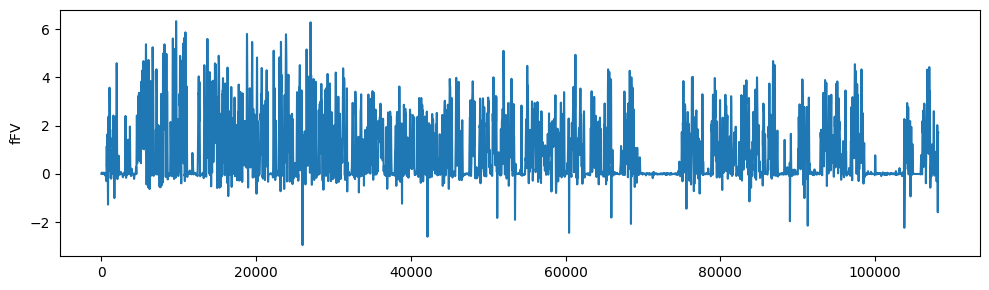

In [30]:
fig = plt.figure(figsize=(10,3)) # creating a figure through matplotlib (length, width)

plt.plot(fFV) # google plt.plot to see what different things you can do to change the look of the line
plt.ylabel('fFV') # can google different elements to change in the plot (yticks, xticks, ylabel, xlabel, can look at only a specific range, etc)

plt.tight_layout()

In [34]:
trxM.shape

(108153, 4, 2)

In [36]:
trxM[0,:, :]

array([[304.22776336, 489.04944987],
       [292.71585041, 507.91158669],
       [270.82266235, 527.78887939],
       [292.62200928, 536.74609375]])